In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data_ingestion import *
from src.feature_extraction import *
from src.baseline_model_training import *
from src.matrix_construction import *
from src.kernel import *
import warnings
warnings.filterwarnings('ignore')

In [3]:
with open('config/data-params.json') as f:
    params = json.load(f)
sitemap = params['sitemap']
out = params['path']
num = params['num']
cat = params['cat']
malware_path = params['malware']

#### Data Ingestion

In [4]:
appurl = get_app_urls(sitemap, out, num)

In [5]:
download_link(appurl, out, 'benign')

In [6]:
clean_disk(out)

In [11]:
#malware
mal_paths = get_malware_paths(malware_path, num*cat)

In [14]:
ben_paths = get_sub_dir(out + '/' + 'benign')

In [17]:
with open('benign_paths.txt', 'w') as f:
    for item in ben_paths:
        f.write("%s\n" % item)
with open('malware_paths.txt', 'w') as f:
    for item in mal_paths:
        f.write("%s\n" % item)

In [4]:
with open('benign_paths.txt') as f:
    ben_paths = f.read().splitlines()

In [5]:
with open('malware_paths.txt') as f:
    mal_paths = f.read().splitlines()

#### Feature Extraction and EDA

In [7]:
benign_df = generate_df(ben_paths, 'benign')

Process ForkPoolWorker-69:
Process ForkPoolWorker-59:
Process ForkPoolWorker-54:
Process ForkPoolWorker-48:
Process ForkPoolWorker-67:
Process ForkPoolWorker-62:
Process ForkPoolWorker-78:
Process ForkPoolWorker-73:
Process ForkPoolWorker-76:
Process ForkPoolWorker-80:
Process ForkPoolWorker-74:
Process ForkPoolWorker-42:
Process ForkPoolWorker-46:
Process ForkPoolWorker-49:
Process ForkPoolWorker-77:
Process ForkPoolWorker-45:
Process ForkPoolWorker-68:
Process ForkPoolWorker-57:
Process ForkPoolWorker-55:
Process ForkPoolWorker-64:
Process ForkPoolWorker-43:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (mo

  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/opt/conda/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/opt/conda/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/opt/co

  File "/opt/conda/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
KeyboardInterrupt
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
KeyboardInterrupt
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(

KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


In [8]:
malware_df = generate_df(mal_paths, 'malware')

Process ForkPoolWorker-120:
Process ForkPoolWorker-83:
Process ForkPoolWorker-101:
Process ForkPoolWorker-118:
Process ForkPoolWorker-114:
Process ForkPoolWorker-98:
Process ForkPoolWorker-115:
Process ForkPoolWorker-108:
Process ForkPoolWorker-109:
Process ForkPoolWorker-99:
Process ForkPoolWorker-112:
Process ForkPoolWorker-104:
Process ForkPoolWorker-110:
Process ForkPoolWorker-92:
Process ForkPoolWorker-94:
Process ForkPoolWorker-93:
Process ForkPoolWorker-90:
Process ForkPoolWorker-117:
Process ForkPoolWorker-102:
Process ForkPoolWorker-96:
Process ForkPoolWorker-119:
Process ForkPoolWorker-97:
Process ForkPoolWorker-95:
Process ForkPoolWorker-116:
Process ForkPoolWorker-111:
Process ForkPoolWorker-105:
Process ForkPoolWorker-100:
Process ForkPoolWorker-89:
Traceback (most recent call last):
Process ForkPoolWorker-113:
Process ForkPoolWorker-82:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last

  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/opt/conda/lib

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in 

  File "/opt/conda/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/opt/conda/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/opt/conda/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt


In [9]:
app_df = pd.concat([benign_df, malware_df])

In [10]:
app_df.head()

,num_code_block,num_uni_block,num_api,num_uni_api,num_package,num_uni_package,num_invoke,category
0,24288,25468,18000,79972,4045,81711,81711,0
1,24132,26219,15431,104752,6156,107633,107633,0
2,52972,57045,33900,186750,10080,191327,191327,0
3,0,0,0,0,0,0,0,0
4,1443,1477,1601,5410,581,5456,5456,0


In [11]:
app_df[app_df.num_api != 0].describe()

,num_code_block,num_uni_block,num_api,num_uni_api,num_package,num_uni_package,num_invoke,category
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,19736.167373,20801.038136,13705.684322,73037.923729,3527.084746,74583.847458,74583.847458,0.529661
std,19198.915553,20305.440669,12751.953961,68960.840022,3313.573055,70373.058997,70373.058997,0.499649
min,37.000000,37.000000,70.000000,134.000000,24.000000,135.000000,135.000000,0.000000
25%,1767.750000,1807.250000,1821.250000,9224.250000,500.000000,9445.250000,9445.250000,0.000000
50%,12238.000000,12643.000000,8701.000000,44152.500000,1999.000000,45497.500000,45497.500000,1.000000
75%,39441.000000,42159.000000,26221.250000,142903.750000,6793.250000,145634.000000,145634.000000,1.000000
max,54665.000000,59050.000000,37994.000000,360551.000000,11170.000000,364966.000000,364966.000000,1.000000


In [68]:
app_df[app_df.num_api != 0].describe().to_csv(os.path.join('output', 'describe.txt'))

In [12]:
len(app_df)

497

In [15]:
len(app_df[app_df.category == 0]) #benign

247

In [16]:
len(app_df[app_df.category == 1]) #malware

250

#### Histogram

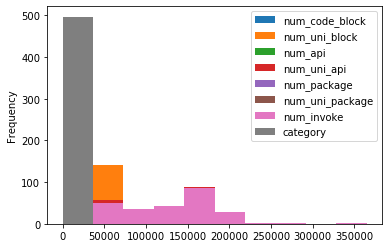

In [17]:
app_df.plot.hist()

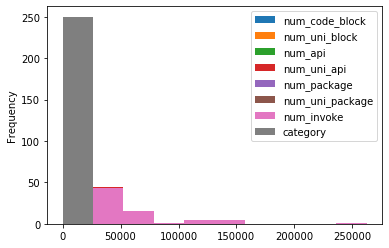

In [18]:
#malware only
app_df[app_df.category == 1].plot.hist()

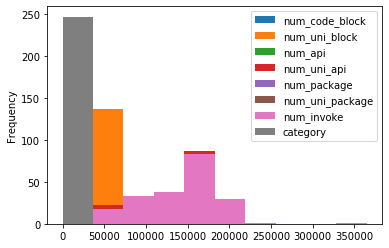

In [19]:
#benign only
app_df[app_df.category == 0].plot.hist()

#### Baseline

Features extracted above will be used for baseline model training including logistic regression, random forest, and gradient boost classifier.

In [37]:
run_baseline(app_df)

--- feature and label ready
--- train and test ready
--- Done fitting logistic regression
--- Done fitting random forest
--- Done fitting gradient boost
--- saving result metrics
--- Finished all baseline tasks!


In [39]:
pd.read_csv('output/baseline_result.txt', index_col = 0)

,tn,fp,fn,tp,acc,fnr
logistic regression,62,17,9,77,0.842424,0.104651
random forest,71,8,5,81,0.921212,0.058140
gradient boost classifier,72,7,6,80,0.921212,0.069767


From the result dataframe, we can observe that the performace of logistic regression is not as good as the other two. Random forest and gradient boost both have high accuracy and low false negative rate.

#### The HIN

Now constructing model and kernels with the Hindroid approach. 

In [40]:
benign_smali = all_smali(ben_paths)
mal_smali = all_smali(mal_paths)

Process ForkPoolWorker-130:
Process ForkPoolWorker-177:
Process ForkPoolWorker-195:
Process ForkPoolWorker-196:
Process ForkPoolWorker-183:
Process ForkPoolWorker-188:
Process ForkPoolWorker-151:
Process ForkPoolWorker-161:
Process ForkPoolWorker-155:
Process ForkPoolWorker-181:
Process ForkPoolWorker-143:
Process ForkPoolWorker-132:
Process ForkPoolWorker-194:
Process ForkPoolWorker-163:
Process ForkPoolWorker-157:
Process ForkPoolWorker-193:
Process ForkPoolWorker-127:
Process ForkPoolWorker-136:
Process ForkPoolWorker-152:
Process ForkPoolWorker-139:
Process ForkPoolWorker-148:
Process ForkPoolWorker-197:
Process ForkPoolWorker-150:
Process ForkPoolWorker-171:
Process ForkPoolWorker-149:
Process ForkPoolWorker-142:
Process ForkPoolWorker-165:
Process ForkPoolWorker-162:
Process ForkPoolWorker-133:
Process ForkPoolWorker-167:
Process ForkPoolWorker-182:
Process ForkPoolWorker-175:
Process ForkPoolWorker-154:
Process ForkPoolWorker-192:
Process ForkPoolWorker-173:
Process ForkPoolWork

  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/multiprocess

  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7

  File "/opt/conda/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/opt/conda/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/opt/conda/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/opt/conda/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/opt/conda/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/opt/conda/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File

  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process

  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multipr

  File "/opt/conda/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/opt/conda/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/opt/conda/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
Keyboar

In [42]:
ben_smali_df = pd.DataFrame(benign_smali)
ben_smali_df['malware'] = 0
mal_smali_df = pd.DataFrame(mal_smali)
mal_smali_df['malware'] = 1

In [43]:
entire = ben_smali_df.append(mal_smali_df, ignore_index = True)

In [44]:
X = entire.drop('malware', axis = 1)
y = entire.malware

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, shuffle = True)

In [47]:
ma, apis = matA(X_train)

In [55]:
mA_test = matAtest(X_test, apis)

In [56]:
mP = matP(apis)

In [57]:
def kernel_train(A, P):
    '''
    Obtain a list of training kernels / metapaths
    :param A: matrix A
    :param B: matrix B
    :param P: matrix P
    :return: list of training metapaths (AA^T, ABA^T, APA^T, APBP^TA^T)
    '''
    return [A.dot(A.T), A.dot(P).dot(A.T)]

In [58]:
def kernel_test(A_train, A_test, P):
    '''
    Obtain a list of test kernels / metapaths
    :param A_train: matrix A
    :param A_test: matrix A test
    :param B: matrix B
    :param P: matrix P
    :return: list of test metapath (AtestA^T, AtestBA^T, AtestPA^T, AtestPBP^TA^T)
    '''
    return [A_test.dot(A_train.T), A_test.dot(P).dot(A_train.T)]

In [60]:
kernels_train = kernel_train(ma, mP)

In [61]:
kernels_test = kernel_test(ma, mA_test, mP)

##### AA^T

In [62]:
aa= SVM_result(kernels_train[0].todense(), kernels_test[0].todense(), y_train, y_test)
aa_train = aa['train']
aa_test = aa['test']

##### APA^T

In [63]:
apa= SVM_result(kernels_train[1].todense(), kernels_test[1].todense(), y_train, y_test)
apa_train = apa['train']
apa_test = apa['test']

##### HIN Result on Training

In [64]:
HIN_train = pd.DataFrame([aa_train, apa_train], index = ['AA^T', 'APA^T'], columns = ['tn', 'fp', 'fn', 'tp', 'acc', 'fnr'])

In [65]:
HIN_train

,tn,fp,fn,tp,acc,fnr
AA^T,160,0,0,172,1.0,0.0
APA^T,160,0,0,172,1.0,0.0


##### HIN Result on Test

In [66]:
HIN_test = pd.DataFrame([aa_test, apa_test], index = ['AA^T', 'APA^T'], columns = ['tn', 'fp', 'fn', 'tp', 'acc', 'fnr'])

In [67]:
HIN_test

,tn,fp,fn,tp,acc,fnr
AA^T,80,7,1,77,0.951515,0.012821
APA^T,78,9,1,77,0.939394,0.012821
